Array insert time: 0.0004069805145263672
Linked list insert time: 0.0916585922241211
Array delete time: 0.0027539730072021484
Linked list delete time: 0.21678900718688965


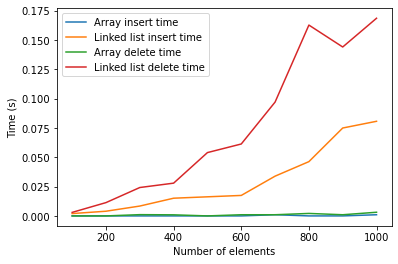

[1, 2, 5, 4, 3, 9, 6, 10, 7, 8]
[1, 2, 5, 4, 3, 9, 6, 10, 7, 8]


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [14]:
from graphviz import Digraph
class Node:
    def __init__(self, key=None, next=None):
        self.key = key
        self.next = next


#1.
class ADT:
    def __init__(self):
        self.root = None

    def get_parent_node(self, i):
        return self.get_node_at_index(self.parent(i))

    def get_left_node(self, i):
        return self.get_node_at_index(self.left_child(i))

    def get_right_node(self, i):
        return self.get_node_at_index(self.right_child(i))

    def parent(self, i):
        return (i + 1) // 2 -1

    def left_child(self, i):
        return 2 * (i + 1) -1

    def right_child(self, i):
        return 2 * (i + 1)

    def get_node_at_index(self, i):
        if i < 0:
            return None
        current = self.root
        for _ in range(i):
            if current is not None:
                current = current.next
            else:
                return None
        return current

#2.

class MinimumPriorityQueue:
    def __init__(self):
        self.tree = ADT()

    def insert(self, key):
        # insert new element at the end of the list
        if self.tree.root is None:
            self.tree.root = Node(key)
        else:
            # iterate through list to find the last element
            tail, tail_idx = self.get_tail_node()
            tail.next = Node(key)

            # compare new element with its parent
            current = tail.next
            current_idx = tail_idx + 1
            parent_index = self.tree.parent(current_idx)
            parent = self.tree.get_node_at_index(parent_index)
            while parent is not None and current.key < parent.key:
# swap new element with its parent
                current.key, parent.key = parent.key, current.key
                current = parent
                parent_index = self.tree.parent(parent_index)
                parent = self.tree.get_node_at_index(parent_index)

    def delMin(self):
        if self.tree.root is None:
            return None

        # remove root node
        min_key = self.tree.root.key
        if not self.tree.root.next:
            self.tree.root = None
        else:
            # replace root node with last node
            p = self.tree.root
            while p.next.next:
                p = p.next
            current_value = p.next.key
            q = self.tree.root
            p.next = None
            left_id = self.tree.left_child(0)
            left = self.tree.get_node_at_index(left_id)
            right_id = self.tree.right_child(0)
            right = self.tree.get_node_at_index(right_id)
            min_child = left if not right or left.key <= right.key else right
            min_id = left_id if not right or left.key < right.key else right_id
            while min_child and min_child.key < current_value:
                q.key = min_child.key
                q = min_child
                left_id = self.tree.left_child(min_id)
                left = self.tree.get_node_at_index(left_id)
                right_id = self.tree.right_child(min_id)
                right = self.tree.get_node_at_index(right_id)
                min_child = left if not right or left.key <= right.key else right
                min_id = left_id if not right or left.key <= right.key else right_id
            if q:
                q.key = current_value

        return min_key





    def get_tail_node(self):
        if self.tree.root is None:
            return None, None
        current = self.tree.root
        idx = 0
        while current.next is not None:
            current = current.next
            idx += 1
        return current, idx

    def print_nodes(self):
        p = self.tree.root
        r = []
        while p:
            r.append(p.key)
            p=p.next
        return r
    def tree_view(self):
        g = Digraph('G', filename='queue.gv')

        p = self.tree.root
        idx = 0
        while p:
            left_id = self.tree.left_child(idx)
            left = self.tree.get_node_at_index(left_id)
            right_id = self.tree.right_child(idx)
            right = self.tree.get_node_at_index(right_id)
            if left:
                g.edge(str(p.key), str(left.key))
                #print(p.key, left.key)
            if right:
                g.edge(str(p.key), str(right.key))
                #print(p.key, right.key)
            p = p.next
            idx += 1
        g.view()
#explain
#insert(): we can insert a new element at the last position of the list, and then compare it with its parent to see if it needs to be swapped.If it is smaller than its parent, we swap it and continue comparing it with its parent until it is in the correct position.
#delMin():  we can delete the root element of the tree, which is the first element of the list, and then replace it with the last element of the list. We then compare this new element with its left and right children, and swap it with the smaller child. We continue comparing it with its children until it is in the correct position.

#3.
#The time complexity of the insert() method is O(nlog n) as in the worst case scenario the element needs to be compared and possibly swapped with all its ancestors before it reaches its correct position. We need to heap n elements in the sorting process, and the time complexity of the heap is O(logn), so the time complexity of the sorting process is O(nlogn). To be more simply, we willdo it log(n) times, while every time get node the time complexity is O(n) so it wil need O(nlogn)The time complexity of the delMin() method is also O(nlog n) as in the worst case scenari the element needs to be compared and possibly swapped with all its descendants before it reaches its correct position. The time complexity of exchanging two node key values is O(1). The time complexity of deleting a node in a singly linked list is O(n). The overall time compelxity of the deleteMin is O(nlogn).

#4.
import time
array_heap = []
linked_list_heap = MinimumPriorityQueue()

# create array based heap and linked list based heap


# measure time for inserting n elements
n = 1000
start_time = time.time()
for i in range(n):
    array_heap.append(i)
array_insert_time = time.time() - start_time

start_time = time.time()
for i in range(n):
    linked_list_heap.insert(i)
linked_list_insert_time = time.time() - start_time

# measure time for deleting n elements
start_time = time.time()
for _ in range(n):
    array_heap.pop(0)
array_delete_time = time.time() - start_time

start_time = time.time()
for _ in range(n):
    linked_list_heap.delMin()
linked_list_delete_time = time.time() - start_time

# print results
print("Array insert time:", array_insert_time)
print("Linked list insert time:", linked_list_insert_time)
print("Array delete time:", array_delete_time)
print("Linked list delete time:", linked_list_delete_time)

# visualize results using a graph
import matplotlib.pyplot as plt

# create lists to store the results
n_values = [i for i in range(100, 1100, 100)]
array_insert_times = []
linked_list_insert_times = []
array_delete_times = []
linked_list_delete_times = []

# measure and store time for inserting and deleting n elements
for n in n_values:
    # measure time for inserting n elements
    array_heap = []
    linked_list_heap = MinimumPriorityQueue()

    start_time = time.time()
    for i in range(n):
        array_heap.append(i)
    array_insert_times.append(time.time() - start_time)

    start_time = time.time()
    for i in range(n):
        linked_list_heap.insert(i)
    linked_list_insert_times.append(time.time() - start_time)

    # measure time for deleting n elements
    start_time = time.time()
    for _ in range(n):
        array_heap.pop(0)
    array_delete_times.append(time.time() - start_time)

    start_time = time.time()
    for _ in range(n):
        linked_list_heap.delMin()
    linked_list_delete_times.append(time.time() - start_time)

# visualize results using a graph
plt.plot(n_values, array_insert_times, label="Array insert time")
plt.plot(n_values, linked_list_insert_times, label="Linked list insert time")
plt.plot(n_values, array_delete_times, label="Array delete time")
plt.plot(n_values, linked_list_delete_times, label="Linked list delete time")
plt.xlabel("Number of elements")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

#5
for i in range(10,0, -1):
    linked_list_heap.insert(i)
print(linked_list_heap.print_nodes())
#linked_list_heap.tree_view()
print(linked_list_heap.print_nodes())
linked_list_heap.tree_view()
